<h2>Detecting Procurement Fraud Using Data Mining and Machine Learning Techniques<h2>

<h4>Data Mining</h4>

<p>The data mining aspect is going to focus on a single device and its monetary values in this case we are looking at smart phones specifically the Samsung s10 to determine whether a price selected by an agent or so is being used for gain or intentional loss</p>

<h4>Tools Used</h4></br>

<ui>
    <li>Selenium</li>
    <li>Selenium Webdriver</li>
    <li>Chromedriver</li>
    <li>Beautiful soup</li>
<ui>
    
***Reason for Using Selenium over Scrapy***
    </br>
<p>I intended to automate the transition between multiple e-comerce pages to scrap and get data while scrapy is useful in scraping the sites I could only use selenium to automate page clicks and to move to pages via search</p>

***note to self previous code segments deleted - this is not getting you what you want Edward!!!! getting data from a string to create other features is difficult with a website like ebay, and jiji, amazon requires more automation to get the specific details***

In [1]:
# class WebDriver:
#     def __init__(self, headless_node = True, *args, **kwargs):
#         self.driver = self._createdriver(headless = headless_node)
        
#     def close(self):
#         try:
#             self.driver.quit()
#         except Exception:
#             pass
        
#     def _createdriver(self, headless = True):
#         webdriver_path = '/Users/edward/Desktop/Capstone/chromedriver'
#         chrome_options = webdriver.ChromeOptions()
        
#         if headless:
#             chrome_options.headless = True
#             chrome_options.add_argument('--headless') 
#             chrome_options.add_argument('start-maximized') 
#             chrome_options.add_argument('disable-infobars')
#             chrobme_options.add_argument('--disable-extensions')
            
#             driver = webdriver.Chrome(options = chrome_options, executable_path = webdriver_path)
#         else:
#             driver = webdriver.Chrome(options = chrome_options, executable_path = webdriver_path)
            
#         return driver

*** note to self - build an adaptive system that can allow a search and train process it will not be easy ***
</br>
*** structure search, pick the details and compare with user details ***

In [2]:
# Importing necessary Libraries
import csv
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

options = webdriver.ChromeOptions()
options.add_argument('--headless') 
options.add_argument('start-maximized') 
options.add_argument('disable-infobars')
options.add_argument('--disable-extensions')

webdriver_path = '/Users/edward/Desktop/Capstone/chromedriver'

def get_url(search_item):
    '''
    This function fetches the URL of the item that you want to search
    '''
    template = 'https://www.flipkart.com/search?q={}&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_4_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_4_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobile+phones&requestId=e625b409-ca2a-456a-b53c-0fdb7618b658&as-backfill=on'
    search_item = search_item.replace(" ","+")
    # Add term query to URL
    url = template.format(search_item)
    # Add term query placeholder
    url += '&page{}'
    return url

def extract_phone_model_info(item):
    """
    This function extracts model, price, ram, storage, stars , number of ratings, number of reviews, 
    storage expandable option, display option, camera quality, battery , processor, warranty of a phone model at flipkart
    """
    # Extracting the model of the phone from the 1st card
    if item.find('div',{'class':"_4rR01T"}) != None:
        model = item.find('div',{'class':"_4rR01T"}).text
    else:
        model = None
        
    if item.find('div',{'class':"_3LWZlK"}) != None:
        star = item.find('div',{'class':"_3LWZlK"}).text
    else:
        star = None
        
    if item.find('span',{'class':"_2_R_DZ"}) != None:
        num_ratings = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[0:item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')].strip()
    else:
        num_ratings = None
        
    if item.find('span',{'class':"_2_R_DZ"}) != None:
        reviews = item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ")[item.find('span',{'class':"_2_R_DZ"}).text.replace('\xa0&\xa0'," ; ").find(';')+1:].strip()
    else:
        reviews = None
        
    if item.find('li',{'class':"rgWa7D"}) != None:
        ram = item.find('li',{'class':"rgWa7D"}).text[0:item.find('li',{'class':"rgWa7D"}).text.find('|')]
    else:
        ram = None
        
    if item.find('li',{'class':"rgWa7D"}) != None:
        storage = item.find('li',{'class':"rgWa7D"}).text[item.find('li',{'class':"rgWa7D"}).text.find('|')+1:][0:10].strip()
    else:
        storage = None
        
    if item.find('li',{'class':"rgWa7D"}) != None:
        expandable = item.find('li',{'class':"rgWa7D"}).text[item.find('li',{'class':"rgWa7D"}).text.find('|')+1:][13:]
    else:
        expandable = None
        
    if item.find_all('li')[1] != None:
        display = item.find_all('li')[1].text.strip()
    else:
        display = None
        
        
    if item.find_all('li')[4] != None:
        processor = item.find_all('li')[4].text.strip()
    else:
        processor = None
        
    if item.find('div',{'class':'_30jeq3 _1_WHN1'}) != None:
        price = item.find('div',{'class':'_30jeq3 _1_WHN1'}).text
    else:
        price = None
        
    if item.find_all('li')[2] != None:
        camera = item.find_all('li')[2].text.strip()
    else:
        camera = None
        
    if item.find_all('li')[3] != None:
        battery = item.find_all('li')[3].text
    else:
        battery = None
        
    if item.find_all('li')[-1] != None:
        warranty = item.find_all('li')[-1].text.strip()
    else:
        warranty = None

    
    result = (model,star,num_ratings,reviews,ram,storage,expandable,display,camera,battery,processor,warranty,price)
    return result

def main(search_item):
    '''
    This function will create a dataframe for all the details that we are fetching from all the multiple pages
    '''
    driver = webdriver.Chrome(webdriver_path)
    records = []
    url = get_url(search_item)
    for page in range(1,200):
        driver.get(url.format(page))
        soup = BeautifulSoup(driver.page_source,'html.parser')
        results = soup.find_all('a',{'class':"_1fQZEK"})
        for item in results:
            records.append(extract_phone_model_info(item))
    driver.close()
    # Saving the data into a csv file
    with open('Flipkart_results.csv','w',newline='',encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Model','Stars','Num_of_Ratings','Reviews','Ram','Storage','Expandable',
                        'Display','Camera','Battery','Processor','Warranty','Price'])
        writer.writerows(records)

In [3]:
# driver = webdriver.Chrome(webdriver_path)
# records = []
# url = get_url('mobile phones') + "2"
# # print(url.format(2))
# # print(driver.get(url))
# print(driver.get("https://www.instagram.com/"))


In [4]:
# takes 40 minutes to run this is why it is commented out whatever I need has already been mined
# main('mobile phones')
import pandas as pd

In [5]:
scraped_df = pd.read_csv('Flipkart_results.csv')

In [6]:
scraped_df

,Model,Stars,Num_of_Ratings,Reviews,Ram,Storage,Expandable,Display,Camera,Battery,Processor,Warranty,Price
0,"realme C20 (Cool Grey, 32 GB)",4.4,"2,60,509 Ratings","12,410 Reviews",2 GB RAM,32 GB ROM,Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...,"₹7,499"
1,"realme C20 (Cool Blue, 32 GB)",4.4,"2,60,509 Ratings","12,410 Reviews",2 GB RAM,32 GB ROM,Expandable Upto 256 GB,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...,"₹7,499"
2,"POCO C31 (Royal Blue, 64 GB)",4.4,"34,714 Ratings","1,984 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Lithium-ion Polymer Battery,MediaTek Helio G35 Processor,"1 Year Warranty for Handset, 6 Months for Acce...","₹8,999"
3,"OPPO K10 (Blue Flame, 128 GB)",NaN,NaN,NaN,6 GB RAM,128 GB RO,Expandable Upto 1 TB,16.74 cm (6.59 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹14,990"
4,"MOTOROLA G60 (Soft Silver, 128 GB)",4.2,"86,298 Ratings","8,771 Reviews",6 GB RAM,128 GB RO,NaN,17.22 cm (6.78 inch) Full HD+ Display,108MP + 8MP + 2MP | 32MP Front Camera,6000 mAh Battery,Qualcomm Snapdragon 732G Processor,1 Year on Handset and 6 Months on Accessories,"₹16,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,"realme 9i (Prism Blue, 64 GB)",4.6,"19,671 Ratings","1,053 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium ion Battery,Qualcomm Snapdragon 680 (SM6225) Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹12,999"
4700,"realme 9i (Prism Black, 64 GB)",4.6,"19,671 Ratings","1,053 Reviews",4 GB RAM,64 GB ROM,Expandable Upto 1 TB,16.76 cm (6.6 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium ion Battery,Qualcomm Snapdragon 680 (SM6225) Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹12,999"
4701,"MOTOROLA g31 (Baby Blue, 64 GB)",4.3,"6,773 Ratings",964 Reviews,4 GB RAM,64 GB ROM,Expandable Upto 1 TB,16.26 cm (6.4 Inch) Full HD+ Display,50MP + 8MP + 2MP | 13MP Front Camera,5000 mAh LiPo Battery,Mediatek Helio G85 Processor,1 Year on Handset and 6 Months on Accessories,"₹11,999"
4702,"REDMI 10 (Midnight Black, 128 GB)",4.4,123 Ratings,7 Reviews,6 GB RAM,128 GB RO,Expandable Upto 1 TB,17.02 cm (6.7 inch) HD+ Display,50MP + 2MP | 5MP Front Camera,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,1 Year Warranty for Phone and 6 Months Warrant...,"₹12,999"


<h4>Data Cleaning and Preprocessing</h4>

In [7]:
scraped_df.isnull().sum()

Model               0
Stars             196
Num_of_Ratings    196
Reviews           196
Ram                 0
Storage             0
Expandable        392
Display             0
Camera              0
Battery             0
Processor           0
Warranty            0
Price               0
dtype: int64

In [8]:
# the rows with empty values are not that relevant I can drop their columns
scraped_df.dropna(how = 'any', axis = 1, inplace = True)

In [9]:
scraped_df.isnull().sum()

Model        0
Ram          0
Storage      0
Display      0
Camera       0
Battery      0
Processor    0
Warranty     0
Price        0
dtype: int64

In [10]:
scraped_df

,Model,Ram,Storage,Display,Camera,Battery,Processor,Warranty,Price
0,"realme C20 (Cool Grey, 32 GB)",2 GB RAM,32 GB ROM,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...,"₹7,499"
1,"realme C20 (Cool Blue, 32 GB)",2 GB RAM,32 GB ROM,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Battery,MediaTek Helio G35 Processor,1 Year Warranty for Mobile and 6 Months for Ac...,"₹7,499"
2,"POCO C31 (Royal Blue, 64 GB)",4 GB RAM,64 GB ROM,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Lithium-ion Polymer Battery,MediaTek Helio G35 Processor,"1 Year Warranty for Handset, 6 Months for Acce...","₹8,999"
3,"OPPO K10 (Blue Flame, 128 GB)",6 GB RAM,128 GB RO,16.74 cm (6.59 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹14,990"
4,"MOTOROLA G60 (Soft Silver, 128 GB)",6 GB RAM,128 GB RO,17.22 cm (6.78 inch) Full HD+ Display,108MP + 8MP + 2MP | 32MP Front Camera,6000 mAh Battery,Qualcomm Snapdragon 732G Processor,1 Year on Handset and 6 Months on Accessories,"₹16,999"
...,...,...,...,...,...,...,...,...,...
4699,"realme 9i (Prism Blue, 64 GB)",4 GB RAM,64 GB ROM,16.76 cm (6.6 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium ion Battery,Qualcomm Snapdragon 680 (SM6225) Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹12,999"
4700,"realme 9i (Prism Black, 64 GB)",4 GB RAM,64 GB ROM,16.76 cm (6.6 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium ion Battery,Qualcomm Snapdragon 680 (SM6225) Processor,1 Year Manufacturer Warranty for Phone and 6 M...,"₹12,999"
4701,"MOTOROLA g31 (Baby Blue, 64 GB)",4 GB RAM,64 GB ROM,16.26 cm (6.4 Inch) Full HD+ Display,50MP + 8MP + 2MP | 13MP Front Camera,5000 mAh LiPo Battery,Mediatek Helio G85 Processor,1 Year on Handset and 6 Months on Accessories,"₹11,999"
4702,"REDMI 10 (Midnight Black, 128 GB)",6 GB RAM,128 GB RO,17.02 cm (6.7 inch) HD+ Display,50MP + 2MP | 5MP Front Camera,6000 mAh Lithium Polymer Battery,Qualcomm Snapdragon 680 Processor,1 Year Warranty for Phone and 6 Months Warrant...,"₹12,999"


*** Format the remaining columns into numerical values and make them continous rather that categorical data ***

In [11]:
# extract other phone features from the data frame
# get the phone type
def get_ram(x):
    x = str(x).split(' ')
#     print(x)
    value = 0
    for i in x:
        if i.isdigit() == True:
            if value == 0:
                value = i
                return float(value)

    
# columns_to_change = ['Ram', 'Display' ,'Storage', 'Battery', 'Warranty']
# for i in columns_to_change:
scraped_df['Ram'] = scraped_df.apply(lambda scraped_df : get_ram(scraped_df['Ram']), axis = 1)


In [12]:
# extract other phone features from the data frame
# get the phone type
def get_display(x):
    x = str(x).split(' ')
#     print(x[0])
    value = x[0]
    return float(value)


    
# columns_to_change = ['Ram', 'Display' ,'Storage', 'Battery', 'Warranty']
# for i in columns_to_change:
scraped_df['Display'] = scraped_df.apply(lambda scraped_df : get_display(scraped_df['Display']), axis = 1)



In [13]:
# extract other phone features from the data frame
# get the phone type
def get_storage(x):
    x = str(x).split(' ')
#     print(x)
    value = 0
    for i in x:
        if i.isdigit() == True:
            if value == 0:
                value = i
                return float(value)

    
# columns_to_change = ['Ram', 'Display' ,'Storage', 'Battery', 'Warranty']
# for i in columns_to_change:
scraped_df['Storage'] = scraped_df.apply(lambda scraped_df : get_storage(scraped_df['Storage']), axis = 1)



In [14]:
# extract other phone features from the data frame
# get the phone type
def get_battery(x):
    x = str(x).split(' ')
#     print(x)
    value = 0
    for i in x:
        if i.isdigit() == True:
            if value == 0:
                value = i
                return float(value)

    
# columns_to_change = ['Ram', 'Display' ,'Storage', 'Battery', 'Warranty']
# for i in columns_to_change:
scraped_df['Battery'] = scraped_df.apply(lambda scraped_df : get_battery(scraped_df['Battery']), axis = 1)



In [15]:
# extract other phone features from the data frame
# get the phone type
def get_warranty(x):
    x = str(x).split(' ')
#     print(x)
    value = 0
    for i in x:
        if i.isdigit() == True:
            if value == 0:
                value = i
                return float(value)

    
# columns_to_change = ['Ram', 'Display' ,'Storage', 'Battery', 'Warranty']
# for i in columns_to_change:
scraped_df['Warranty'] = scraped_df.apply(lambda scraped_df : get_warranty(scraped_df['Warranty']), axis = 1)



In [16]:
# extract other phone features from the data frame
# get the phone type
def get_warranty(x):
    x = x.replace('₹', '')
    x = x.replace(',', '')
    x = float(x)
    return x

    

scraped_df['Price'] = scraped_df.apply(lambda scraped_df : get_warranty(scraped_df['Price']), axis = 1)



In [17]:
scraped_df

,Model,Ram,Storage,Display,Camera,Battery,Processor,Warranty,Price
0,"realme C20 (Cool Grey, 32 GB)",2.0,32.0,16.51,8MP Rear Camera | 5MP Front Camera,5000.0,MediaTek Helio G35 Processor,1.0,7499.0
1,"realme C20 (Cool Blue, 32 GB)",2.0,32.0,16.51,8MP Rear Camera | 5MP Front Camera,5000.0,MediaTek Helio G35 Processor,1.0,7499.0
2,"POCO C31 (Royal Blue, 64 GB)",4.0,64.0,16.59,13MP + 2MP + 2MP | 5MP Front Camera,5000.0,MediaTek Helio G35 Processor,1.0,8999.0
3,"OPPO K10 (Blue Flame, 128 GB)",6.0,128.0,16.74,50MP + 2MP + 2MP | 16MP Front Camera,5000.0,Qualcomm Snapdragon 680 Processor,1.0,14990.0
4,"MOTOROLA G60 (Soft Silver, 128 GB)",6.0,128.0,17.22,108MP + 8MP + 2MP | 32MP Front Camera,6000.0,Qualcomm Snapdragon 732G Processor,1.0,16999.0
...,...,...,...,...,...,...,...,...,...
4699,"realme 9i (Prism Blue, 64 GB)",4.0,64.0,16.76,50MP + 2MP + 2MP | 16MP Front Camera,5000.0,Qualcomm Snapdragon 680 (SM6225) Processor,1.0,12999.0
4700,"realme 9i (Prism Black, 64 GB)",4.0,64.0,16.76,50MP + 2MP + 2MP | 16MP Front Camera,5000.0,Qualcomm Snapdragon 680 (SM6225) Processor,1.0,12999.0
4701,"MOTOROLA g31 (Baby Blue, 64 GB)",4.0,64.0,16.26,50MP + 8MP + 2MP | 13MP Front Camera,5000.0,Mediatek Helio G85 Processor,1.0,11999.0
4702,"REDMI 10 (Midnight Black, 128 GB)",6.0,128.0,17.02,50MP + 2MP | 5MP Front Camera,6000.0,Qualcomm Snapdragon 680 Processor,1.0,12999.0


<h4>Normalisation, Scaling and Transformation of data</h4>

In [18]:
# create pipeline that will be used for everything
from sklearn.pipeline import Pipeline

In [19]:
# because I plan on using SVM I will be using standardization
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

In [20]:
# split the data it is only one data set no need for a target value
from sklearn.model_selection import train_test_split
# X_train, X_test = train_test_split(scraped_df, test_size = 0.10, random_state = 50)



*** to perform anomaly detection I am going to use novelty detection by building upon the data that is there so a semi-supervised technique ***

In [21]:
scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test) 

In [22]:
# the novelty detection model going to be used

In [23]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA

In [24]:
# Using PCA to reduce the density of the model to be able to plot it
# pca = PCA(n_components=2)
# pca.fit(X)
# X_pca = pca.transform(X)

In [25]:
# Encoding the string values in the datafile
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# columns to be encoded
df_encode = scraped_df[['Model', 'Camera', 'Processor']]

In [26]:
# encoded
enc_df = pd.DataFrame(enc.fit_transform(df_encode).toarray())




In [27]:
enc_df

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
# continous data to be processed in other ways
to_process = scraped_df[['Ram', 'Storage', 'Display', 'Battery', 'Warranty', 'Price']]


In [29]:
# pipeline
pipe = Pipeline([('scalar',scaler),
                     ('pca1',PCA(n_components=2))])

In [30]:
# combine the two dataframes again
after_encoding_df = enc_df.join(to_process)
after_encoding_df

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,Ram,Storage,Display,Battery,Warranty,Price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.59,5000.0,1.0,8999.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,128.0,16.74,5000.0,1.0,14990.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,128.0,17.22,6000.0,1.0,16999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0
4700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0
4701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.26,5000.0,1.0,11999.0
4702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,128.0,17.02,6000.0,1.0,12999.0


In [31]:
# scaled = scaler.fit_transform(after_encoding_df)
# scaled
X=after_encoding_df.iloc[:, :-1]
y = after_encoding_df.iloc[:, -1]

In [32]:
# features
X

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,Ram,Storage,Display,Battery,Warranty
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,64.0,16.59,5000.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,6.0,128.0,16.74,5000.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,6.0,128.0,17.22,6000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0
4700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0
4701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,64.0,16.26,5000.0,1.0
4702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,6.0,128.0,17.02,6000.0,1.0


In [33]:
# target data
y

0        7499.0
1        7499.0
2        8999.0
3       14990.0
4       16999.0
         ...   
4699    12999.0
4700    12999.0
4701    11999.0
4702    12999.0
4703    14999.0
Name: Price, Length: 4704, dtype: float64

In [34]:
# pca = PCA()
# pca.fit(after_encoding_df)
# X_pca = pca.transform(after_encoding_df)


pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [35]:
X_pca

array([[-251.58371573,  -36.67170055],
       [-251.58371573,  -36.67170055],
       [-250.36034565,   -4.66018979],
       ...,
       [-250.35995346,   -4.65156953],
       [ 751.35636151,   21.16029589],
       [-247.91892018,   59.28598244]])

<h3>Outlier Anomaly Detection using LOF</h3>

In [44]:
# Using local outlier factor to train on and later to identify any new outliers
# novelty is set to true and contamination is set to auto
clf = LocalOutlierFactor(novelty = True, n_neighbors = 20, contamination=0.1)


In [45]:
# split
X_train, X_test = train_test_split(after_encoding_df, test_size = 0.15, random_state = 50)



In [46]:
fit = clf.fit(after_encoding_df)

positions = fit.predict(X_test)

In [47]:
train_list = []

In [48]:
# Change the anomalies' values to make it consistent with the true values
prediction_novelty = [1 if i==-1 else 0 for i in positions]

In [49]:
# Check the model performance
outlier_index = (fit == -1)

In [55]:
outlier_index

False

<h3>Using Deep learning Auto encoder</h3>

In [117]:
test1 = after_encoding_df.copy()

In [118]:
v = [0 for i in range(len(test1))]

In [119]:
outlier = pd.Series(v)
test1['Outlier'] = outlier

In [120]:
test1['Outlier'][1] = 1
test1['Outlier'][0] = 1
test1['Outlier'][17] = 1
test1['Outlier'][29] = 1
test1['Outlier'][33] = 1

<ipython-input-120-2a3f1e7f1ef6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['Outlier'][1] = 1
<ipython-input-120-2a3f1e7f1ef6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['Outlier'][0] = 1
<ipython-input-120-2a3f1e7f1ef6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['Outlier'][17] = 1
<ipython-input-120-2a3f1e7f1ef6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [121]:
test1

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,Ram,Storage,Display,Battery,Warranty,Price,Outlier
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0,1
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,64.0,16.59,5000.0,1.0,8999.0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,128.0,16.74,5000.0,1.0,14990.0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,128.0,17.22,6000.0,1.0,16999.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0,0
4700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0,0
4701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,64.0,16.26,5000.0,1.0,11999.0,0
4702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,128.0,17.02,6000.0,1.0,12999.0,0


In [122]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, decomposition, preprocessing

[0.23459576 0.12031891 0.09453439]


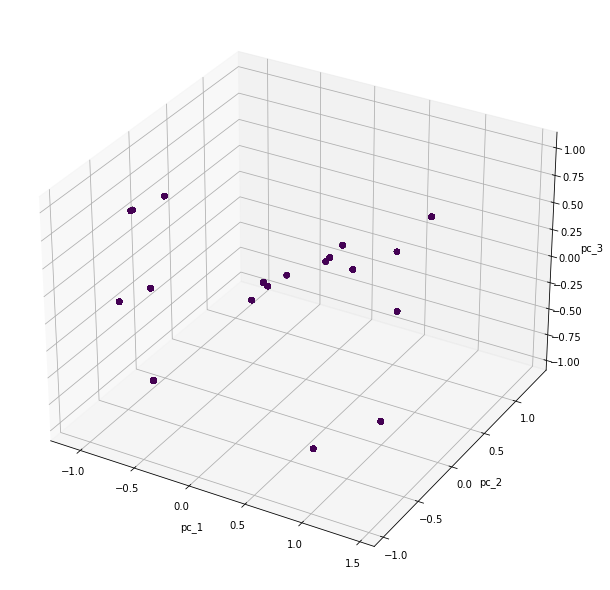

In [123]:
# def data_transformation(datafile):

def show_pca_df(df):
    x = df[df.columns[:-1]].to_numpy()
    y = df[df.columns[-1]].to_numpy()

    x = preprocessing.MinMaxScaler().fit_transform(x)
    pca = decomposition.PCA(n_components=3)
    pca_result = pca.fit_transform(x)
    print(pca.explained_variance_ratio_)

    pca_df = pd.DataFrame(data=pca_result, columns=['pc_1', 'pc_2', 'pc_3'])
    pca_df = pd.concat([pca_df, pd.DataFrame({'label': y})], axis=1)

    ax = Axes3D(plt.figure(figsize=(8, 8)))
    ax.scatter(xs=pca_df['pc_1'], ys=pca_df['pc_2'], zs=pca_df['pc_3'], c=pca_df['label'], s=25)
    ax.set_xlabel("pc_1")
    ax.set_ylabel("pc_2")
    ax.set_zlabel("pc_3")
    plt.show()


show_pca_df(test1)

In [124]:
len_of_df = len(test1.columns) - 1
len_of_df

53

[0       False
1       False
2        True
3        True
4        True
        ...  
4699     True
4700     True
4701     True
4702     True
4703     True
Name: Outlier, Length: 4704, dtype: bool]
[0.23459576 0.12031891 0.09453439]


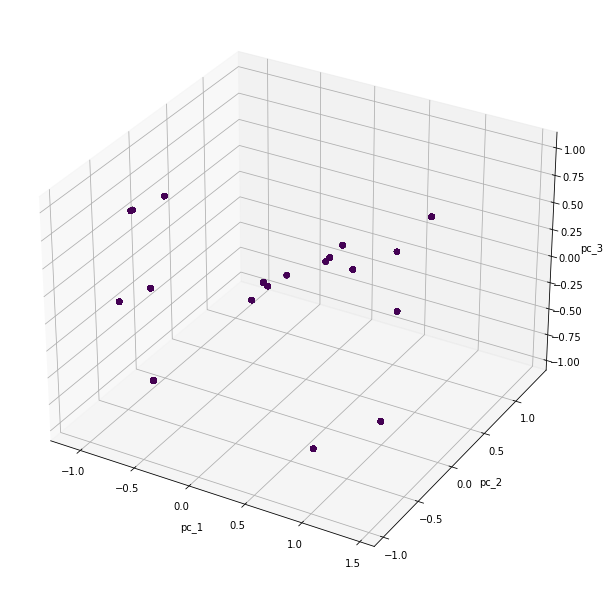

In [125]:
print([test1[test1.columns[len_of_df]] == 0])
df_anomaly = test1[test1[test1.columns[len_of_df]] > 0]
df_normal = test1[test1[test1.columns[len_of_df]] == 0].sample(n=df_anomaly.size, random_state=1, axis='index')
df = pd.concat([ df_anomaly, df_normal])

show_pca_df(test1)

In [126]:
test2 = after_encoding_df.copy()

In [128]:
v = [0 for i in range(len(test2))]

In [129]:
outlier = pd.Series(v)
test2['Outlier'] = outlier

In [130]:
test2['Outlier'][1] = 1
test2['Outlier'][0] = 1
test2['Outlier'][17] = 1
test2['Outlier'][29] = 1
test2['Outlier'][33] = 1

<ipython-input-130-17933fc2df7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['Outlier'][1] = 1
<ipython-input-130-17933fc2df7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['Outlier'][0] = 1
<ipython-input-130-17933fc2df7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['Outlier'][17] = 1
<ipython-input-130-17933fc2df7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [146]:
import matplotlib.lines as lines
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets, decomposition, preprocessing, model_selection
from keras import models, layers, activations, losses, optimizers, metrics
from keras.callbacks import EarlyStopping
import seaborn as sns

Epoch 1/100


<ipython-input-144-fd75e90abfe9>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  scaler.fit(df.drop('anomaly', 1))


7/7 [==============================] - 1s 21ms/step - loss: 0.2329 - mean_squared_error: 0.2329 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2252 - mean_squared_error: 0.2252 - val_loss: 0.2188 - val_mean_squared_error: 0.2188
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2156 - mean_squared_error: 0.2156 - val_loss: 0.2065 - val_mean_squared_error: 0.2065
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2021 - mean_squared_error: 0.2021 - val_loss: 0.1900 - val_mean_squared_error: 0.1900
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1844 - mean_squared_error: 0.1844 - val_loss: 0.1691 - val_mean_squared_error: 0.1691
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.1643 - mean_squared_error: 0.1643 - val_loss: 0.1452 - val_mean_squared_error: 0.1452
Epoch 7/100
7/7 [==============================] - 0s 4ms

7/7 [==============================] - 0s 4ms/step - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 53/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0507 - mean_squared_error: 0.0507 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 54/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0489 - mean_squared_error: 0.0489 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 55/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 56/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 57/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0464 - mean_squared_error: 0.0464 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 58/100
7/7 [==============================] - 0

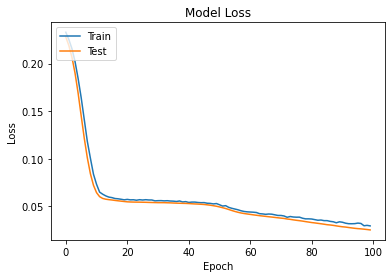

In [144]:
x = df[df.columns[1:]].to_numpy()
y = df[df.columns[-1]].to_numpy()

# prepare data
df = pd.concat([pd.DataFrame(x), pd.DataFrame({'anomaly': y})], axis=1)
normal_events = df[df['anomaly'] == 0]
abnormal_events = df[df['anomaly'] == 1]

normal_events = normal_events.loc[:, normal_events.columns != 'anomaly']
abnormal_events = abnormal_events.loc[:, abnormal_events.columns != 'anomaly']

# scaling
scaler = preprocessing.MinMaxScaler()
scaler.fit(df.drop('anomaly', 1))

scaled_data = scaler.transform(normal_events)

# 80% percent of dataset is designated to training
train_data, test_data = train_test_split(scaled_data, test_size=0.2)

n_features = x.shape[1]

# model
encoder = models.Sequential(name='encoder')
encoder.add(layer=layers.Dense(units=20, activation=activations.relu, input_shape=[n_features]))
encoder.add(layers.Dropout(0.1))
encoder.add(layer=layers.Dense(units=10, activation=activations.relu))
encoder.add(layer=layers.Dense(units=5, activation=activations.relu))

decoder = models.Sequential(name='decoder')
decoder.add(layer=layers.Dense(units=10, activation=activations.relu, input_shape=[5]))
decoder.add(layer=layers.Dense(units=20, activation=activations.relu))
decoder.add(layers.Dropout(0.1))
decoder.add(layer=layers.Dense(units=n_features, activation=activations.sigmoid))

autoencoder = models.Sequential([encoder, decoder])

autoencoder.compile(
	loss=losses.MSE,
	optimizer=tf.optimizers.Adam(),
	metrics=[metrics.mean_squared_error])

# train model
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=20, restore_best_weights=True)
history = autoencoder.fit(x=train_data, y=train_data, epochs=100, verbose=1, validation_data=[test_data, test_data], callbacks=[es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [147]:
train_predicted_x = autoencoder.predict(x=train_data)
train_events_mse = losses.mean_squared_error(train_data, train_predicted_x)
cut_off = np.percentile(train_events_mse, 95)

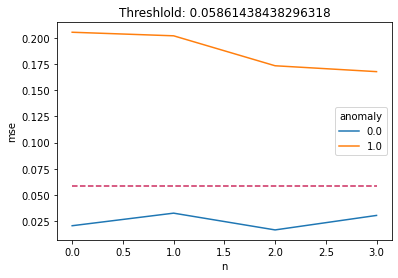

In [148]:
plot_samples = 4
# normal event
real_x = test_data[:plot_samples].reshape(plot_samples, n_features)
predicted_x = autoencoder.predict(x=real_x)
normal_events_mse = losses.mean_squared_error(real_x, predicted_x)
normal_events_df = pd.DataFrame({
	'mse': normal_events_mse,
	'n': np.arange(0, plot_samples),
	'anomaly': np.zeros(plot_samples)})



# abnormal event
abnormal_x = scaler.transform(abnormal_events)[:plot_samples].reshape(plot_samples, n_features)
predicted_x = autoencoder.predict(x=abnormal_x)
abnormal_events_mse = losses.mean_squared_error(abnormal_x, predicted_x)
abnormal_events_df = pd.DataFrame({
	'mse': abnormal_events_mse,
	'n': np.arange(0, plot_samples),
	'anomaly': np.ones(plot_samples)})

mse_df = pd.concat([normal_events_df, abnormal_events_df])
plot = sns.lineplot(x=mse_df.n, y=mse_df.mse, hue=mse_df.anomaly)

line = lines.Line2D(
	xdata=np.arange(0, plot_samples),
	ydata=np.full(plot_samples, cut_off),
	color='#CC2B5E',
	linewidth=1.5,
	linestyle='dashed')

plot.add_artist(line)
plt.title('Threshlold: {threshold}'.format(threshold=cut_off))
plt.show()

<h3>Anomaly Dection Using SVM</h3>

In [163]:
from sklearn.svm import OneClassSVM

In [164]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03)
model.fit(X_train)

OneClassSVM(gamma=0.001, nu=0.03)

In [165]:
# to predict
y_pred = model.predict(X_test)
# y_pred

In [166]:
# filter outlier index
outlier_index = (y_pred == -1) 
# filter outlier values
outlier_values = X_test.iloc[outlier_index]

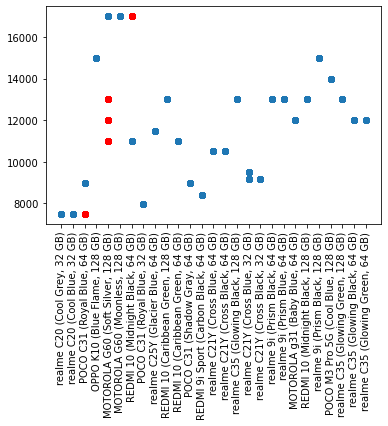

In [167]:
# visualize outputs
plt.scatter(scraped_df["Model"], scraped_df["Price"])
plt.xticks(rotation=90)
plt.scatter(outlier_values["Ram"], outlier_values["Price"], c = "r")

In [168]:
outlier_values

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,Ram,Storage,Display,Battery,Warranty,Price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0
2526,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,128.0,17.22,6000.0,1.0,16999.0
3312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0
4557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0
840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0
1714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4.0,64.0,17.02,6000.0,1.0,10999.0
2194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4.0,64.0,17.02,6000.0,1.0,10999.0


In [169]:
# Below are the outliers in their rows using Outlier anomaly detection
outlier_values

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,Ram,Storage,Display,Battery,Warranty,Price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0
2526,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,128.0,17.22,6000.0,1.0,16999.0
3312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0
4557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0
840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0
1714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4.0,64.0,17.02,6000.0,1.0,10999.0
2194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4.0,64.0,17.02,6000.0,1.0,10999.0


In [170]:
scraped_df

,Model,Ram,Storage,Display,Camera,Battery,Processor,Warranty,Price
0,"realme C20 (Cool Grey, 32 GB)",2.0,32.0,16.51,8MP Rear Camera | 5MP Front Camera,5000.0,MediaTek Helio G35 Processor,1.0,7499.0
1,"realme C20 (Cool Blue, 32 GB)",2.0,32.0,16.51,8MP Rear Camera | 5MP Front Camera,5000.0,MediaTek Helio G35 Processor,1.0,7499.0
2,"POCO C31 (Royal Blue, 64 GB)",4.0,64.0,16.59,13MP + 2MP + 2MP | 5MP Front Camera,5000.0,MediaTek Helio G35 Processor,1.0,8999.0
3,"OPPO K10 (Blue Flame, 128 GB)",6.0,128.0,16.74,50MP + 2MP + 2MP | 16MP Front Camera,5000.0,Qualcomm Snapdragon 680 Processor,1.0,14990.0
4,"MOTOROLA G60 (Soft Silver, 128 GB)",6.0,128.0,17.22,108MP + 8MP + 2MP | 32MP Front Camera,6000.0,Qualcomm Snapdragon 732G Processor,1.0,16999.0
...,...,...,...,...,...,...,...,...,...
4699,"realme 9i (Prism Blue, 64 GB)",4.0,64.0,16.76,50MP + 2MP + 2MP | 16MP Front Camera,5000.0,Qualcomm Snapdragon 680 (SM6225) Processor,1.0,12999.0
4700,"realme 9i (Prism Black, 64 GB)",4.0,64.0,16.76,50MP + 2MP + 2MP | 16MP Front Camera,5000.0,Qualcomm Snapdragon 680 (SM6225) Processor,1.0,12999.0
4701,"MOTOROLA g31 (Baby Blue, 64 GB)",4.0,64.0,16.26,50MP + 8MP + 2MP | 13MP Front Camera,5000.0,Mediatek Helio G85 Processor,1.0,11999.0
4702,"REDMI 10 (Midnight Black, 128 GB)",6.0,128.0,17.02,50MP + 2MP | 5MP Front Camera,6000.0,Qualcomm Snapdragon 680 Processor,1.0,12999.0


In [171]:
count = 0
dictionary = {1 : 0, -1 : 0}
for i in positions:
    if i == 1:
        dictionary[1] += 1
    else:
        dictionary[-1] += 1
    

In [172]:
# there are only three anomalies in the test set
dictionary

{1: 706, -1: 0}

In [173]:
X_test['not_outlier'] = positions

<ipython-input-173-8b621962adc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['not_outlier'] = positions


In [177]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError


In [178]:
data = after_encoding_df.copy()
data

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,Ram,Storage,Display,Battery,Warranty,Price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.59,5000.0,1.0,8999.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,128.0,16.74,5000.0,1.0,14990.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,128.0,17.22,6000.0,1.0,16999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0
4700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0
4701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,64.0,16.26,5000.0,1.0,11999.0
4702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,128.0,17.02,6000.0,1.0,12999.0


In [179]:
# last column is the target
# 0 = anomaly, 1 = normal
TARGET = ['Price']

features = data.drop(TARGET, axis=1)
target = data[TARGET]

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target
)

# use case is novelty detection so use only the normal data
# for training
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

# min max scale the input data
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [180]:
# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded
  
model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/20
8/8 [==============================] - 2s 22ms/step - loss: 0.1509 - mse: 0.2387 - val_loss: 0.1484 - val_mse: 0.2343
Epoch 2/20
8/8 [==============================] - 0s 6ms/step - loss: 0.1448 - mse: 0.2281 - val_loss: 0.1387 - val_mse: 0.2174
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 0.1297 - mse: 0.2026 - val_loss: 0.1143 - val_mse: 0.1774
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 0.0983 - mse: 0.1539 - val_loss: 0.0707 - val_mse: 0.1136
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0580 - mse: 0.0982 - val_loss: 0.0379 - val_mse: 0.0723
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 0.0366 - mse: 0.0720 - val_loss: 0.0320 - val_mse: 0.0670
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 0.0332 - mse: 0.0691 - val_loss: 0.0323 - val_mse: 0.0678
Epoch 8/20
8/8 [==============================] - 0s 6ms/step - loss: 0.0330 - mse: 0.0692 - val_loss: 

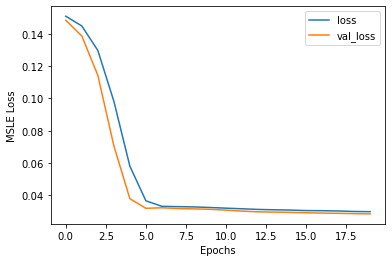

In [181]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [182]:
def find_threshold(model, x_train_scaled):
  reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
  reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
  threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
  return threshold

def get_predictions(model, x_test_scaled, threshold):
  predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
  errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
# Threshold: 0.01001314025746261
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)
# 0.944

Threshold: 0.033726788864612445


0.0

In [183]:
for i in predictions:
    if i == -1:
        print(i)
        

In [184]:
predict = [[0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,32,16.51,5000.0,1.0, 50000]]
test_df = pd.DataFrame(data)

In [185]:
new_test = after_encoding_df.copy()

In [186]:
len(new_test)

4704

In [187]:
v = [1 for i in range(len(new_test))]

In [188]:
print(v)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [189]:
outlier = pd.Series(v)

In [190]:
new_test['Outlier'] = outlier

In [191]:
new_test['Outlier'][1] = 0
new_test['Outlier'][0] = 0

<ipython-input-191-459389ce7df8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['Outlier'][1] = 0
<ipython-input-191-459389ce7df8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['Outlier'][0] = 0


In [192]:
new_test

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,Ram,Storage,Display,Battery,Warranty,Price,Outlier
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,32.0,16.51,5000.0,1.0,7499.0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,64.0,16.59,5000.0,1.0,8999.0,1
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,128.0,16.74,5000.0,1.0,14990.0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,128.0,17.22,6000.0,1.0,16999.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0,1
4700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,64.0,16.76,5000.0,1.0,12999.0,1
4701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,64.0,16.26,5000.0,1.0,11999.0,1
4702,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,128.0,17.02,6000.0,1.0,12999.0,1


In [198]:
from pyod.models.lof import LOF
from pyod.models.ocsvm import OCSVM
from pyod.models.iforest import IForest
from pyod.utils.data import evaluate_print

In [199]:
X = new_test.drop('Outlier', 1).values
y = new_test['Outlier'].values

<ipython-input-199-526ddabe4c70>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = new_test.drop('Outlier', 1).values


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)

In [201]:
Classifiers = {'Local Outlier Factor (LOF)' : LOF(n_neighbors = 20, algorithm = 'auto', metric = 'minkowski', p=2, metric_params = None, contamination = 0.002, n_jobs = -1),
                'OneClassSVM': OCSVM(kernel = 'linear', nu = 0.05, max_iter = -1, contamination = 0.002),
                  'IsolationForests': IForest(n_estimators = 100, contamination = 0.002, n_jobs = -1, random_state=42)}


In [202]:
for i, (clf_name, clf) in enumerate(Classifiers.items()):
    print()
    print(i+1, 'fitting', clf_name)
    
    clf.fit(X_train)
    
#     y_train_pred = clf.labels
    y_train_score = clf.decision_scores_
    
    y_test_pred = clf.predict(X_test)
    y_test_scores = clf.decision_function(X_test)
    y_test_proba = clf.predict_proba(X_test)
    
#     evaluate_print(clf_name, y_test, y_test_scores)


1 fitting Local Outlier Factor (LOF)

2 fitting OneClassSVM

3 fitting IsolationForests


In [150]:

import anvil.server

anvil.server.connect("42HFXAQKUL5FMWDLC7OBURF7-RIWH76LXJK2LE7WI")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [155]:
@anvil.server.callable
def get_columns():
    return list(scraped_df.columns)

['Model',
 'Ram',
 'Storage',
 'Display',
 'Camera',
 'Battery',
 'Processor',
 'Warranty',
 'Price']

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/Users/edward/opt/anaconda3/lib/python3.8/site-packages/anvil/server.py", line 401, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/Users/edward/opt/anaconda3/lib/python3.8/site-packages/anvil/server.py", line 393, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/Users/edward/opt/anaconda3/lib/python3.8/site-packages/anvil/_threaded_server.py", line 429, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/edward/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/edward/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/edward/opt/anac

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnecti

Exception in thread Thread-9:
Traceback (most recent call last):
  File "/Users/edward/opt/anaconda3/lib/python3.8/site-packages/anvil/server.py", line 401, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "/Users/edward/opt/anaconda3/lib/python3.8/site-packages/anvil/server.py", line 393, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "/Users/edward/opt/anaconda3/lib/python3.8/site-packages/anvil/_threaded_server.py", line 429, in do_call
    raise error_from_server
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/edward/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/edward/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/edward/opt/anac

Anvil websocket closed (code 1006, reason=Going away)
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [206]:
@anvil.server.callable
def predict(items):
    df = pd.DataFrame(items)
    df = df.pipe()
    return clf.pred(df)